In [519]:
# 11/12(수) 14:10

# 선형회귀 개요

선형 회귀(Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법. 

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력.
- Weight와 bias는 선형 회귀 모델 학습 과정에서 최적화해야 하는 파라미터.
  - 가중치는 각 feature(X) 가 target(y)에 미치는 영향도를 나타내는 값이다.
  - 양수 가중치는 target값을 증가시키고, 음수 가중치는 감소시킨다. 0에서 멀수록 target에 큰 영향을 미치는 feature이며, 0에 가까울수록 target과의 연관성이 적은 feature다.
  - bias는 모든 feature가 0일 때의 target 값이다. 
- $\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b$
    - $\hat{y_i}$: 예측값
    - $x$: 특성(feature-컬럼)
    - $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
    - $b$: 절편
    - $p$: p 번째 특성(feature)/p번째 가중치
    - $i$: i번째 관측치(sample)

## 실습
#### Boston housing dataset loading

In [520]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data, x,y 분리
df = pd.read_csv("data/boston_dataset.csv")
X = df.drop(columns='MEDV')
y = df['MEDV']

# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론.
- 학습 결과 속성(Instance 변수)
    - **coef_**: 각 Feature에 곱하는 가중치
    - **intercept_**: y절편. 모든 Feature가 0일때 예측값
    
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
      -  원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [521]:
# 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습

In [522]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [523]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [524]:
## 학습을 통해 찾은 weights 와 bias 조회
print("weights")
print(lr.coef_)

weights
[-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]


> ### Boston Housing DataSet
> 미국 보스톤의 구역별 집값 데이터셋
>  - CRIM	: 지역별 범죄 발생률
>  - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
>  - INDUS: 비상업지역 토지의 비율
>  - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
>  - NOX	: 일산화질소 농도
>  - RM	: 주택 1가구당 평균 방의 개수
>  - AGE	: 1940년 이전에 건축된 소유주택의 비율
>  - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
>  - RAD	: 고속도로까지의 접근성 지수
>  - TAX	: 10,000 달러 당 재산세율
>  - PTRATIO : 지역별 교사 한명당 학생 비율
>  - B	: 지역의 흑인 거주 비율
>  - LSTAT: 하위계층의 비율(%)>  
>  - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)
> 

In [525]:
import pandas as pd
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.970820
ZN         1.057149
INDUS      0.038311
CHAS       0.594506
NOX       -1.855148
RM         2.573219
AGE       -0.087615
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
B          0.718179
LSTAT     -3.592455
dtype: float64

In [526]:
print("bias")
lr.intercept_

bias


np.float64(22.611881188118804)

In [527]:
X_train.values[0] @ lr.coef_ + lr.intercept_

np.float64(-328.25093531295647)

##### 평가

In [528]:
## 회귀 - mse, rmse, (ma-절대값-e), r2
from metrics import print_regression_metrics

print_regression_metrics(y_train, lr.predict(X_train_scaled), title="Trainset")

Trainset
MSE: 19.326470203585725
RMSE: 4.396188144698282
R Squared: 0.7730135569264234


In [529]:
print_regression_metrics(y_test, lr.predict(X_test_scaled), title="Testset")

Testset
MSE: 33.44897999767651
RMSE: 5.7835093150851336
R Squared: 0.5892223849182511


### Pipeline 이용
- Feature Scaler -> LinearRegression

pipeline은 머신러닝에서 여러 전처리 단계와 최종 모델 학습 단계를 하나의 연속된 흐름으로 연결해주는 도구. 데이터 전처리 (스케일링 등)과 모델 학습 (선형회귀 등)을 깔끔하게 묶어줌.

In [530]:
from sklearn.pipeline import Pipeline

pl = Pipeline([("scaler", StandardScaler()),("model", LinearRegression())], verbose=True)

pl.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,True
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [531]:
pred = pl.predict(X_test)

In [532]:
y_test.mean()

np.float64(22.21960784313725)

In [533]:
print_regression_metrics(y_test, pred)

MSE: 33.44897999767651
RMSE: 5.7835093150851336
R Squared: 0.5892223849182511


In [ ]:
import matplotlib.pyplot as plt

# 폰트를 'AppleGothic'으로 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 부호 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False 

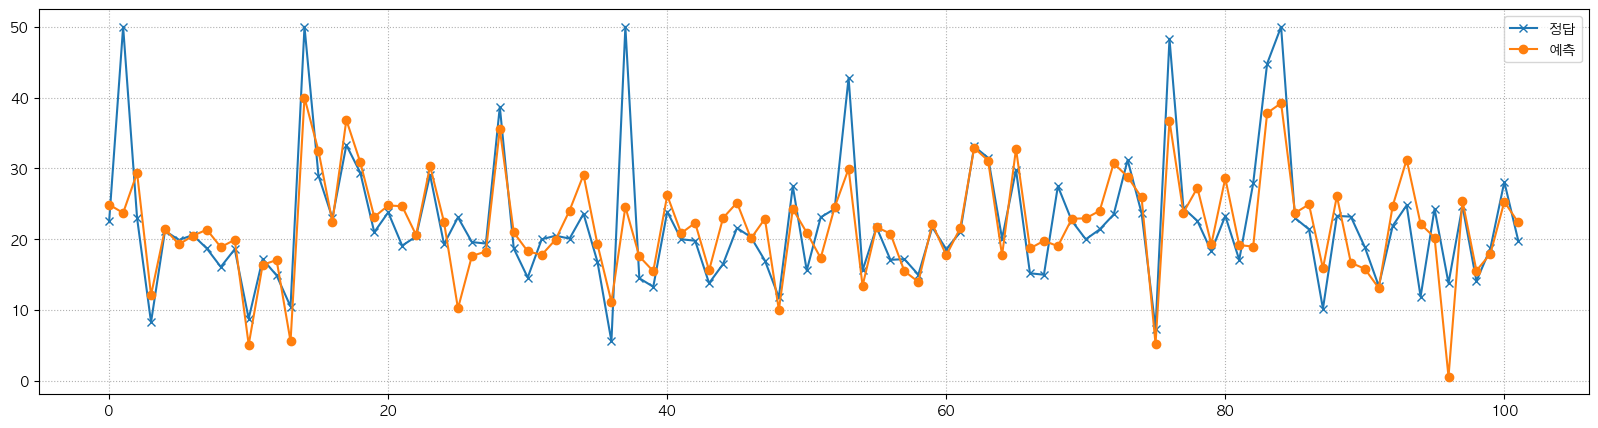

In [535]:
### y_test 정답과 추론값 비교 - 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(range(y_test.size), y_test, marker="x", label="정답")
plt.plot(range(y_test.size), pred, marker='o', label="예측")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

- underfitting이 된 경우

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터(Coef, weight)를 기준으로는 일차식이 되어 선형모델이다. 그렇지만 input 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환.

## 예제

##### 데이터셋 만들기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
# 난수 생성기 시드를 0으로 설정. 항상 동일한 순서의 난수를 생성. 
# 코드를 실행할 때마다 동일한 데이터셋이 생성되도록 보장해 재현성 높이는데 필수적. 

# 모델링을 통해 찾아야 하는 함수.
def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))
    # noise =  np.random.normal(0,1, size=(X.size, 1))
    # 0과 1 사이의 무작위 수 생성 
    
m = 100 
# 샘플 수 100개
X = 6 * np.random.rand(m, 1) - 3
# X 생성. 
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

(100, 1) (100,)


In [537]:
y

array([ 1.21351048,  5.85899537,  3.46241391,  0.80557742,  3.24001022,
        5.53751717,  2.94453566,  9.6962122 , 11.45061754,  2.8441925 ,
        6.4108992 ,  3.42587158,  2.78322459, 12.05098881,  6.40694503,
        6.36598871,  7.41866431,  9.76448419,  6.58121501,  9.55078589,
       15.00157938,  5.6690428 ,  0.5518094 ,  7.48565004,  3.78224205,
        5.48795143,  4.02558834, 11.03885474,  4.07121653,  3.23065947,
        4.45051879,  7.25879499,  0.94489687,  4.48926404,  7.18101265,
        4.00644134,  4.07218254,  3.03884203, 12.3654127 ,  5.20323883,
        2.24404201,  0.66553003,  4.89011658,  7.65019762,  3.30723338,
        3.92241485,  2.84675921,  6.57986645,  2.79126583,  2.2584176 ,
        1.82865766,  2.30657014, 12.84223457,  5.3453594 ,  2.66851321,
        4.77389514,  4.33915851,  2.50259206,  2.23473005,  1.72495005,
        2.64942272,  5.56671365,  3.98445289,  5.17694591,  5.87688042,
        2.77722142,  6.72245668,  6.54340969,  6.82320541,  4.98

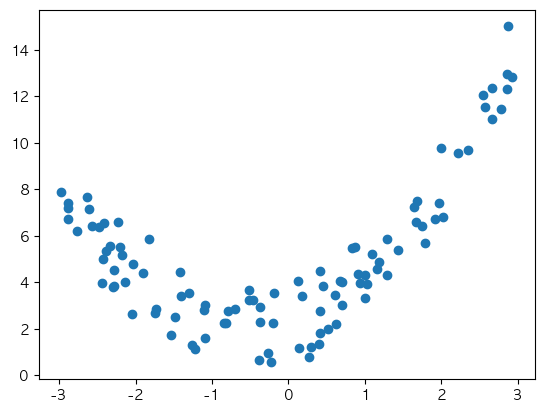

In [538]:
import matplotlib.pyplot as plt
plt.scatter(X,  y)
plt.show()

##### 모델생성, 학습

In [539]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

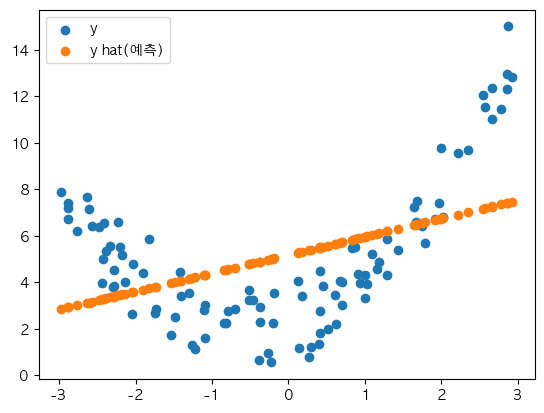

In [540]:
import matplotlib.pyplot as plt
plt.scatter(X,  y, label="y")
plt.scatter(X, pred, label='y hat(예측)')
plt.legend()
plt.show()

In [541]:
lr.coef_, lr.intercept_

(array([0.78189543]), np.float64(5.175619278567209))

In [542]:
from metrics import print_regression_metrics
print_regression_metrics(y, pred)

MSE: 7.729204760808937
RMSE: 2.7801447373848966
R Squared: 0.19138252437306003


##### PolynomialFeatures를 이용해 다항회귀구현

In [543]:
X.shape

(100, 1)

In [544]:
from sklearn.preprocessing import PolynomialFeatures
pnf = PolynomialFeatures(
    degree=2,            # 최고차항의 차수. ex) degree=4로 하면: x(원래 컬럼), x^2, x^3, x^4  한 feature추가.
    include_bias=False,  #True(기본값) - 상수항 feature 생성여부. (모든 값이 1인 feature 추가여부)
)
# pnf.fit(X)
# pnf.transform(X)
X_poly = pnf.fit_transform(X)

In [545]:
print(X.shape, X_poly.shape)

(100, 1) (100, 2)


In [546]:
X[:3]**2

array([[0.08577929],
       [1.66703268],
       [0.38017121]])

In [547]:
X_poly[:3]  # X[:3]**2한 값과 같음.

array([[0.29288102, 0.08577929],
       [1.2911362 , 1.66703268],
       [0.61658026, 0.38017121]])

##### LinearRegression 모델을 이용해 평가

In [548]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [549]:
lr2.coef_, lr2.intercept_

(array([0.97906552, 0.94978823]), np.float64(2.3405007562628866))

##### 시각화

In [550]:
X_new = np.linspace(-3, 3, 1000)[..., np.newaxis]  # (1000, ) -> (1000, 1)
X_new_poly = pnf.transform(X_new)
# X_new_poly.shape
y_hat = lr2.predict(X_new_poly)

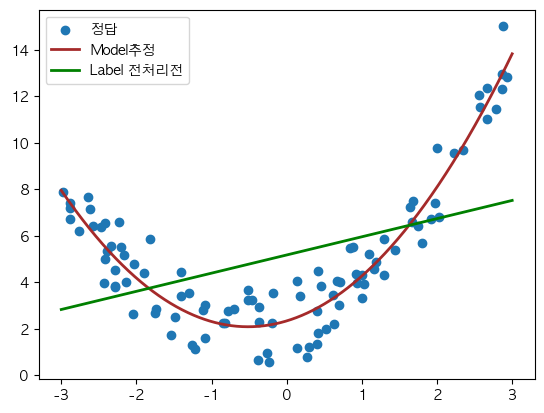

In [551]:
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = "malgun gothic"
# plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='brown', linewidth=2, label="Model추정")
plt.plot(X_new, lr.predict(X_new), color="g", linewidth=2, label="Label 전처리전")
plt.legend()
plt.show()

In [552]:
# 평가
from metrics import print_regression_metrics
print_regression_metrics(y, lr2.predict(X_poly))

MSE: 0.9735576723414217
RMSE: 0.9866902616026073
R Squared: 0.8981478985551461


## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [553]:
pnf3 = PolynomialFeatures(degree=25, include_bias=False)
X_poly3 = pnf3.fit_transform(X)
print(X_poly3.shape)
lr3 = LinearRegression()
lr3.fit(X_poly3, y)

(100, 25)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [554]:
pred3 = lr3.predict(X_poly3)
print_regression_metrics(y, pred3)

MSE: 0.8369908358206739
RMSE: 0.9148720324836004
R Squared: 0.9124353102642656


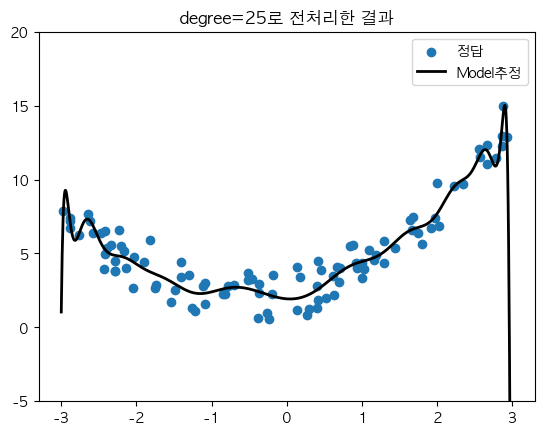

In [555]:
# degree=25 시각화
y_hat = lr3.predict(pnf3.transform(X_new))
plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.legend()
plt.title("degree=25로 전처리한 결과")
plt.ylim(-5, 20)
plt.show()

### PolynomialFeatures 예제

In [556]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
data = np.arange(12).reshape(6, 2)
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [557]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
poly2 = pnf.fit_transform(data)
poly2.shape

(6, 5)

In [558]:
# 변환 후 각 feature를 어떻게 계산했는지 조회
pnf.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [559]:
poly2

array([[  0.,   1.,   0.,   0.,   1.],
       [  2.,   3.,   4.,   6.,   9.],
       [  4.,   5.,  16.,  20.,  25.],
       [  6.,   7.,  36.,  42.,  49.],
       [  8.,   9.,  64.,  72.,  81.],
       [ 10.,  11., 100., 110., 121.]])

In [560]:
pd.DataFrame(poly2, columns=pnf.get_feature_names_out())

,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0
5,10.0,11.0,100.0,110.0,121.0


In [561]:
pnf2 = PolynomialFeatures(degree=5, include_bias=False)  # degree도 튜닝 대상.
poly_n = pnf2.fit_transform(data)
poly_n.shape, data.shape

((6, 20), (6, 2))

In [562]:
pnf2.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

### PolynomialFeatures를 Boston Dataset에 적용

In [563]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from metrics import print_regression_metrics

df = pd.read_csv('data/boston_dataset.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [564]:
# 전처리 pipeline
preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), 
    ("scaler", StandardScaler()), 
])

In [565]:
tmp = preprocessor.fit_transform(X_train)

In [566]:
X_train.shape

(404, 13)

In [567]:
tmp.shape

(404, 104)

In [568]:
preprocessor.steps[0][1].get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

#### 모델링

In [569]:
pipeline = Pipeline([
    ("preprocessor", preprocessor), 
    ("model", LinearRegression())
])

In [570]:
# 학습
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('poly', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False


In [571]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [572]:
print_regression_metrics(y_train, pred_train, "Train set")

Train set
MSE: 4.3402780520122715
RMSE: 2.083333399149611
R Squared: 0.9490240966612832


In [573]:
print_regression_metrics(y_test, pred_test, "Test set")

Test set
MSE: 31.277814971445547
RMSE: 5.592657237078413
R Squared: 0.6158858584079063


## 규제 (Regularization)
- 선형 회귀 모델에서 **과대적합(Overfitting) 문제를 해결**하기 위해 가중치(회귀계수)에 페널티 값을 적용.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생.
- 해결
    - 데이터를 더 수집. 
    - Feature selection
        - 불필요한 Features들을 제거.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

**feature 많으면 overfitting -> Ridge, Rasso**
**Feature 적으면 underfitting -> feature 늘린다. PF (간단하게 처리 되지요~)**

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
  - MSE(손실함수)는 예측값과 실제값 간의 오차를 계산.이때 L2 규제를 적용하면, 손실함수에 가중치의 제곱합(∑wᵢ²)을 더해 오차를 인위적으로 크게 만든다.
      - 이로 인해 모델이 오차를 최소화하려면 가중치의 크기를 줄여야 한다.
      - 결과적으로 가중치들이 0에 가까운 값으로 수렴하게 된다.
      - 이는 각 feature의 영향력을 줄여서 모델이 과도하게 복잡해지는 것을 방지. 즉 모델의 복잡도를 낮추고 일반화 성능을 향상.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용.

In [574]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/boston_dataset.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [575]:
# 전처리
## Ridge Regression은 LinearRegression 모델과 같은 공식의 모델임. 단지 최적화 방법이 다른 것 뿐이다.
## 그래서 데이터 전처리는 연속형 Feature는 Feature Scaling을 범주형 Feature는 One Hot Encoding을 한다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 규제 alpha 에 따른 weight 변화

In [576]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df = pd.DataFrame() 
bias_list = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    # 모델 생성 -> hyper parameter alpha 를 설정.
    model = Ridge(alpha=alpha, random_state=0)
    # 학습
    model.fit(X_train_scaled, y_train)
    # 학습 후 찾은 weight와 bias를 저장.
    coef_df[f"{alpha}"] = model.coef_
    bias_list.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

Alpha 0.001 - Train: 0.7730135569106857, Test: 0.589221294505559
Alpha 0.01 - Train: 0.7730135553534744, Test: 0.5892114815046757
Alpha 0.1 - Train: 0.7730134004374536, Test: 0.5891134222735186
Alpha 1 - Train: 0.7729986739069824, Test: 0.5881400471345533
Alpha 10 - Train: 0.772025270378812, Test: 0.5791628807875255
Alpha 100 - Train: 0.7515163225742546, Test: 0.5272685191319559
Alpha 500 - Train: 0.6588192082625857, Test: 0.42879808129182595
Alpha 1000 - Train: 0.5728326430134054, Test: 0.3655172284411423


In [577]:
coef_df.index = X_train.columns

In [578]:
coef_df

,0.001,0.01,0.1,1,10,100,500,1000
CRIM,-0.970811,-0.970732,-0.969942,-0.962257,-0.901965,-0.708783,-0.543189,-0.453716
ZN,1.057132,1.056981,1.055479,1.040872,0.926287,0.602925,0.475571,0.416153
INDUS,0.038283,0.038034,0.035549,0.011680,-0.157051,-0.481556,-0.547926,-0.504161
CHAS,0.594511,0.594550,0.594942,0.598719,0.625918,0.662516,0.506250,0.369364
NOX,-1.855112,-1.854790,-1.851578,-1.820134,-1.560302,-0.702047,-0.405744,-0.374977
RM,2.573230,2.573329,2.574308,2.583786,2.653906,2.643872,1.813405,1.294925
AGE,-0.087623,-0.087694,-0.088395,-0.095188,-0.146581,-0.263320,-0.317919,-0.322093
DIS,-2.880909,-2.880612,-2.877636,-2.848263,-2.588020,-1.393256,-0.358183,-0.078157
RAD,2.112167,2.111458,2.104394,2.036231,1.533846,0.322752,-0.210082,-0.290222
TAX,-1.875259,-1.874610,-1.868146,-1.806092,-1.370452,-0.612679,-0.519593,-0.478899


In [579]:
bias_list

[np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804)]

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
  - MSE(손실함수)는 예측값과 실제값 간의 오차를 계산한다.이때 L1 규제를 적용하면, 손실함수에 가중치 절댓값의 합(∑|wᵢ|) 을 추가한다.
    - 이로 인해 손실값이 커지고, 모델은 손실을 줄이기 위해 가중치 중 일부를 정확히 0으로 만든다.
    - 결과적으로 불필요한 feature의 가중치가 0이 되어 모델에서 제외된다. 즉, feature selection이 자동으로 일어난다.
    -  이는 모델 해석력을 높이고,  불필요한 특성이 개입되는 것을 막아 일반화 성능을 높이는 효과를 준다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [580]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df2 = pd.DataFrame() 
bias_list2 = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    model = Lasso(alpha=alpha, random_state=0)
    model.fit(X_train_scaled, y_train)
    coef_df2[f"{alpha}"] = model.coef_
    bias_list2.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

Alpha 0.001 - Train: 0.7730127295116839, Test: 0.5890287763120774
Alpha 0.01 - Train: 0.7729557113377097, Test: 0.5874763161420908
Alpha 0.1 - Train: 0.7676692732920614, Test: 0.5663726208397636
Alpha 1 - Train: 0.7066864437965619, Test: 0.5069663003862215
Alpha 10 - Train: 0.0, Test: -0.001889737528507185
Alpha 100 - Train: 0.0, Test: -0.001889737528507185
Alpha 500 - Train: 0.0, Test: -0.001889737528507185
Alpha 1000 - Train: 0.0, Test: -0.001889737528507185


In [581]:
bias_list2

[np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118808),
 np.float64(22.611881188118808),
 np.float64(22.611881188118808),
 np.float64(22.611881188118808)]

In [582]:
coef_df2.index = X_train.columns

In [583]:
coef_df2

,0.001,0.01,0.1,1,10,100,500,1000
CRIM,-0.967874,-0.940302,-0.663468,-0.000000,-0.0,-0.0,-0.0,-0.0
ZN,1.053234,1.021582,0.701524,0.000000,0.0,0.0,0.0,0.0
INDUS,0.028566,-0.000000,-0.130724,-0.000000,-0.0,-0.0,-0.0,-0.0
CHAS,0.594814,0.594840,0.588934,0.000000,0.0,0.0,0.0,0.0
NOX,-1.848201,-1.804075,-1.358749,-0.000000,-0.0,-0.0,-0.0,-0.0
RM,2.574014,2.585398,2.722754,2.540098,0.0,0.0,0.0,0.0
AGE,-0.085817,-0.069486,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
DIS,-2.874999,-2.809365,-2.140932,-0.000000,0.0,0.0,0.0,0.0
RAD,2.093952,1.956109,0.640853,-0.000000,-0.0,-0.0,-0.0,-0.0
TAX,-1.857546,-1.738284,-0.658779,-0.171527,-0.0,-0.0,-0.0,-0.0


### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

In [584]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), 
    ("scaler", StandardScaler()), 
])

In [585]:
X_train_poly = preprocessor.fit_transform(X_train)
X_test_poly = preprocessor.transform(X_test)

In [586]:
X_train_poly.shape

(404, 104)

##### LinearRegression으로 평가

In [587]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from metrics import print_regression_metrics

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print_regression_metrics(y_train, lr.predict(X_train_poly))
print('-------------------------------------')
print_regression_metrics(y_test, lr.predict(X_test_poly))

MSE: 4.3402780520122715
RMSE: 2.083333399149611
R Squared: 0.9490240966612832
-------------------------------------
MSE: 31.277814971445547
RMSE: 5.592657237078413
R Squared: 0.6158858584079063


##### Ridge 의 alpha값 변화에 따른 R square 확인

In [588]:
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 20]
train_r2 = []
test_r2 = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_poly, y_train)
    train_r2.append(r2_score(y_train, ridge.predict(X_train_poly)))
    test_r2.append(r2_score(y_test, ridge.predict(X_test_poly)))

In [589]:
ridge_df = pd.DataFrame({"alpha":alpha_list, "train":train_r2, "test":test_r2})
ridge_df.set_index("alpha", inplace=True)
ridge_df

,train,test
alpha,,
0.001,0.948809,0.623663
0.010,0.947669,0.636538
0.100,0.941685,0.667476
1.000,0.929584,0.742633
10.000,0.898313,0.740306
20.000,0.881200,0.718677


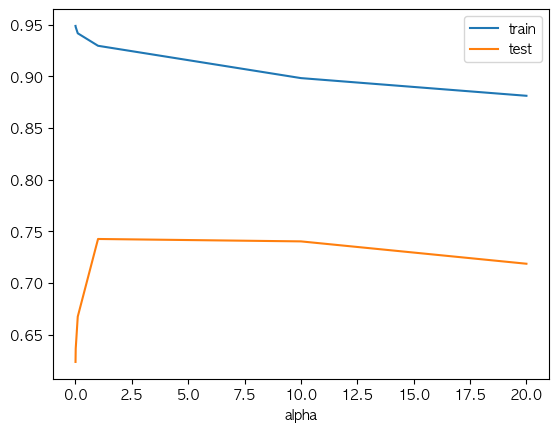

In [590]:
ridge_df.plot();

##### lasso 의 alpha값 변화에 따른 R square 확인

In [591]:
import warnings
warnings.filterwarnings('ignore')

In [592]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 20]
train_r2 = []
test_r2 = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_poly, y_train)
    train_r2.append(r2_score(y_train, lasso.predict(X_train_poly)))
    test_r2.append(r2_score(y_test, lasso.predict(X_test_poly)))

In [593]:
lasso_df = pd.DataFrame({"alpha":alpha_list, "train":train_r2, "test":test_r2})
lasso_df.set_index("alpha", inplace=True)
lasso_df

,train,test
alpha,,
0.001,0.934216,0.600479
0.010,0.926367,0.678741
0.100,0.859929,0.706008
1.000,0.754489,0.586474
10.000,0.000000,-0.001890
20.000,0.000000,-0.001890


## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [594]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.5, l1_ratio=0.3)
model.fit(X_train_poly, y_train)

,alpha,0.5
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [595]:
print_regression_metrics(y_train, model.predict(X_train_poly), "==========Trainset")
print_regression_metrics(y_test, model.predict(X_test_poly), "==========Testset")

==========Trainset
MSE: 17.932543567258534
RMSE: 4.234683408149721
R Squared: 0.7893850125389811
==========Testset
MSE: 31.77314113785274
RMSE: 5.636766904693926
R Squared: 0.6098028955989219


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용.

딥러닝이 wxtb 많이 만든 것. 
딥러닝에서도 규제 사용.

파라미터의 영향을 줄여준다. 